[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sue1242/utilization-azrue-ai/blob/main/src/5-3_custom_vision.ipynb)

## 必要なモジュールのインストール

In [ ]:
!pip install azure-cognitiveservices-vision-computervision==0.9.0 azure-cognitiveservices-vision-customvision==3.1.0 azure-cognitiveservices-vision-face==0.5.0 cognitive-face==1.5.0 python-dotenv==0.15.0

## 必要なデータの準備
### 必要なファイルをGoogle Colabにアップロード
Google Colabでの実行時のみ必要

In [ ]:
# from google.colab import files
# files.upload()

findfont: Font family ['Meiryo'] not found. Falling back to DejaVu Sans.


{'hirosima_test1.jpg': {'大阪城': '38.253%', '広島城': '17.062%', '松本城': '44.686%'},
 'matsumoto_test1.jpg': {'大阪城': '6.862%', '広島城': '2.600%', '松本城': '90.538%'},
 'matsumoto_test2.jpg': {'大阪城': '0.481%', '広島城': '10.049%', '松本城': '89.470%'},
 'matsumoto_test3.jpg': {'大阪城': '0.061%', '広島城': '0.186%', '松本城': '99.753%'},
 'matsumoto_test4.jpg': {'大阪城': '0.057%', '広島城': '1.829%', '松本城': '98.114%'},
 'matsumoto_test5.jpg': {'大阪城': '2.138%', '広島城': '0.503%', '松本城': '97.359%'},
 'matsumoto_test6.jpg': {'大阪城': '0.016%', '広島城': '99.594%', '松本城': '0.390%'},
 'matsumoto_test7.jpg': {'大阪城': '0.484%', '広島城': '1.686%', '松本城': '97.830%'},
 'osaka_test1.jpg': {'大阪城': '99.707%', '広島城': '0.277%', '松本城': '0.016%'},
 'osaka_test2.jpg': {'大阪城': '98.381%', '広島城': '0.800%', '松本城': '0.819%'},
 'osaka_test3.jpg': {'大阪城': '46.713%', '広島城': '53.061%', '松本城': '0.226%'},
 'osaka_test4.jpg': {'大阪城': '99.890%', '広島城': '0.093%', '松本城': '0.018%'},
 'osaka_test5.jpg': {'大阪城': '6.625%', '広島城': '72.853%', '松本城': '20.521%'},
 '

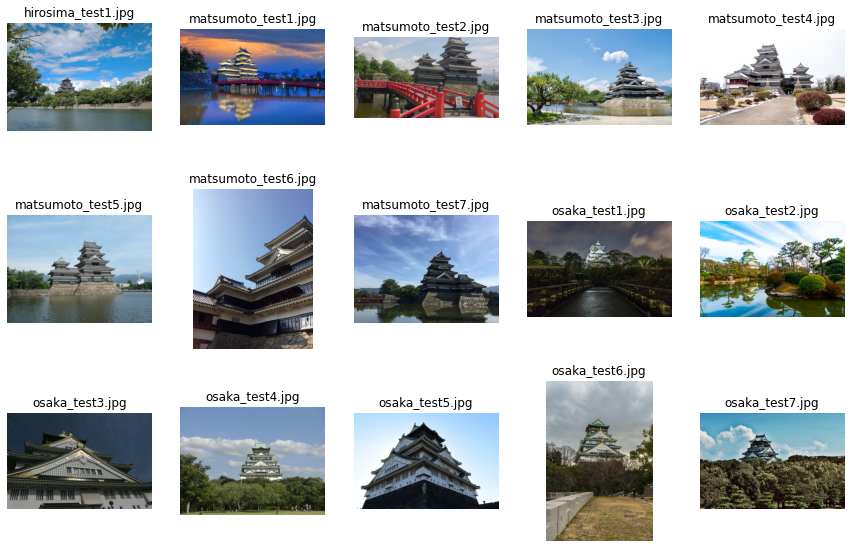

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from pprint import pprint
import os

from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from dotenv import load_dotenv
from msrest.authentication import ApiKeyCredentials

load_dotenv(r'.env') # 皆さんのPCでの.envファイルの保存場所に合わせて変更しましょう

model_name = os.getenv('CV_MODEL_NAME')
project_id = os.getenv('CV_PROJECT_ID')
cv_key = os.getenv('CV_KEY')
cv_endpoint = os.getenv('CV_ENDPOINT')

# Windows用
plt.rcParams['font.family'] = 'Meiryo'
# Mac用
# plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

# フォルダにある画像ファイルの取得
test_folder = r'../data/5-3/custom_vision/test' # 皆さんのPCでのファイル保存場所に合わせて変更しましょう
test_images = sorted(os.listdir(test_folder))

# KeyとEndpointの設定
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
custom_vision_client = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

# 写真描画範囲の設定
_, axes = plt.subplots(3, 5, figsize=(15, 10))
# 結果格納用のdict
results_dict = {}
for i, (ax, image) in enumerate(zip(axes.ravel(), test_images)):
    # 各画像の結果格納用のdict
    results_dict[image] = {}
    # 画像を開き、custom visionのモデルに判別させる
    image_contents = open(os.path.join(test_folder, image), "rb")
    # Model NameとProjetc IDの設定
    classification = custom_vision_client.classify_image(
        project_id, 
        model_name, 
        image_contents.read()
    )
    
    # 画像を図示する
    img = Image.open(os.path.join(test_folder, image))
    ax.axis('off')
    imgplot = ax.imshow(img)
    ax.set_title(image)
    # 各画像の予測結果を結果格納用のdictに入力する
    for prediction in classification.predictions:
        results_dict[image][prediction.tag_name] = "{0:.3f}%".format(prediction.probability * 100)
pprint(results_dict)